In [1]:
import microgp4 as ugp

/var/folders/g4/jsfj0k8x6rj21bygpnmzqb940000gn/T/ipykernel_13162/70525116.py:1: RuntimeWarning: 
  Paranoia checks are always enabled in notebooks: performances can be significantly impaired
  import microgp4 as ugp


In [66]:
byte = ugp.f.integer_parameter(0, 255)
reg = ugp.f.choice_parameter(['ax', 'bx', 'cx'])

/var/folders/g4/jsfj0k8x6rj21bygpnmzqb940000gn/T/ipykernel_13162/2378170238.py:1: SyntaxWarning: Friendly suggestion:
  Parameter ranges are half-open: the maximum value is 254 (ie. a range of 2**8-1 possible values) — did you mean '(0, 2**8)'?
  byte = ugp.f.integer_parameter(0, 255)


In [49]:
macro1 = ugp.f.macro('''{reg} = {val:#x}  {_comment} {_node.attributes._zap}''', reg=reg, val=byte)
macro2 = ugp.f.macro('jmp {target}', target=ugp.f.local_reference(backward=False, loop=False))

In [50]:
sub = ugp.f.bunch([macro1], size=(2, 5), extra_parameters={})
macro3 = ugp.f.macro('call {t1}\ncall {t2}', 
                     t1=ugp.f.global_reference(sub, creative_zeal=1, first_macro=True), 
                     t2=ugp.f.global_reference(sub, creative_zeal=1, first_macro=True))

In [51]:
prog = ugp.f.bunch([macro1, macro2, macro3], size=5)

In [52]:
pop = ugp.classes.Population(prog, None)

In [53]:
pop.add_random_individual()

In [54]:
pop.individuals[0]

In [55]:
print(pop.dump_individual(0, extra_parameters={}))

; Automagically generated by MicroGP v4!2.0a0.dev1 on 17-May-2023 at 16:52:32
call n8
call n8
jmp n6
call n11
call n8
call n8
call n11
n6:
cx = 0xe4  ; None
n8:
ax = 0x5e  ; None
bx = 0xd4  ; None
n11:
ax = 0x4a  ; None
bx = 0x41  ; None
bx = 0xef  ; None
ax = 0xb  ; None



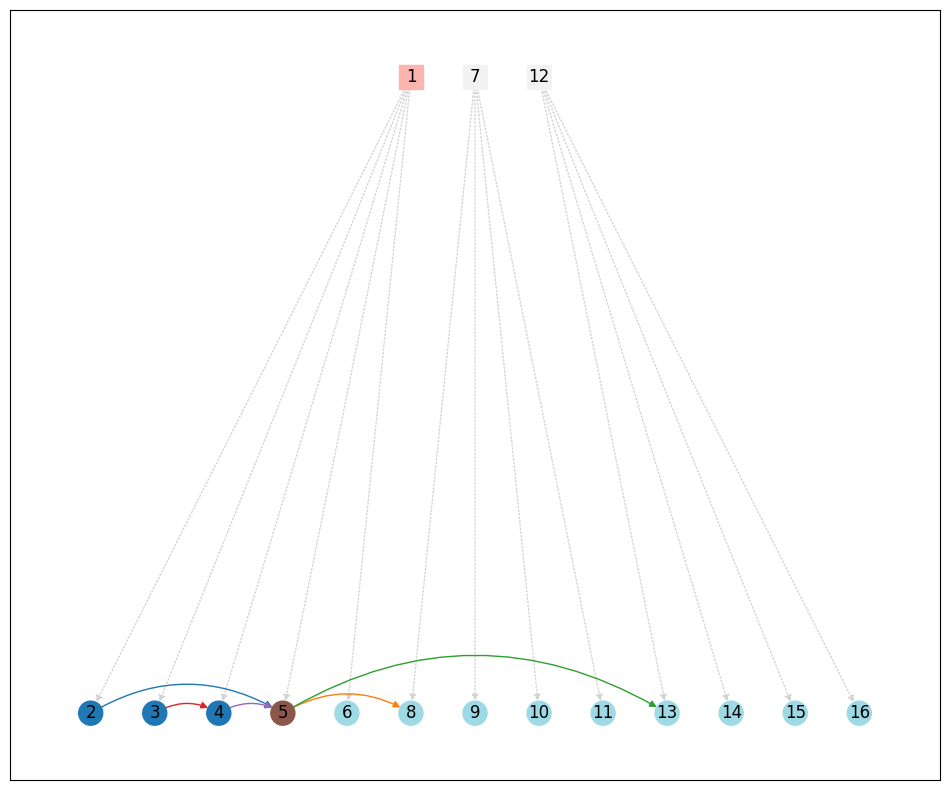

In [10]:
pop.individuals[0].as_forest()

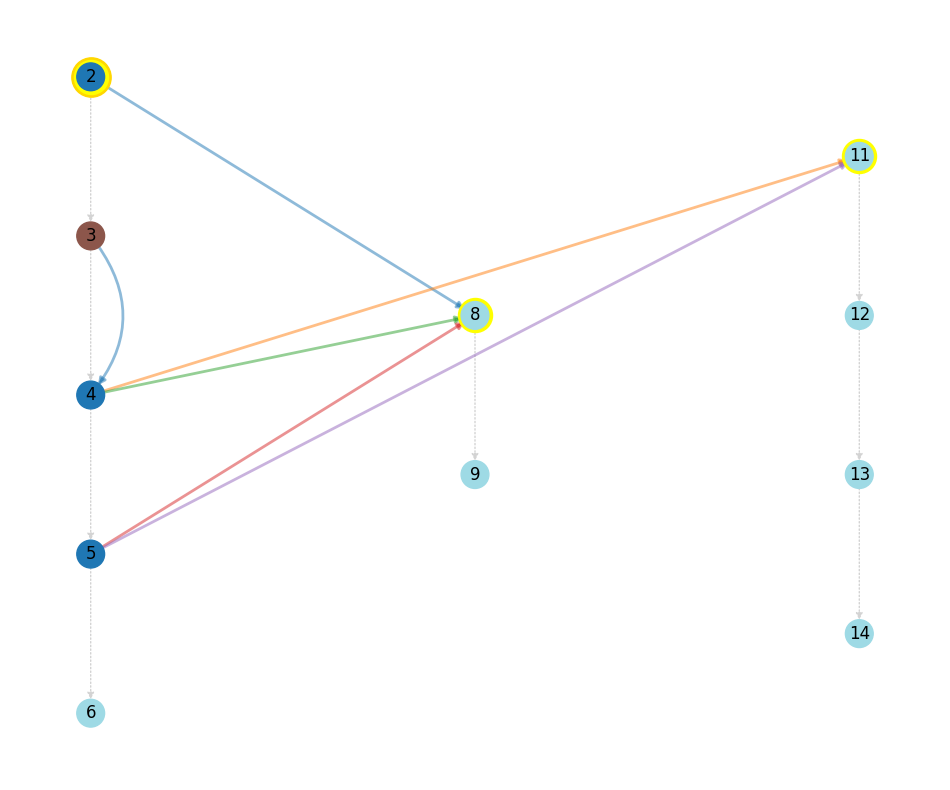

In [63]:
pop.individuals[0].as_lgp()

In [64]:
pop.individuals[0].genome.nodes[4]['_macro'].mutate(1)

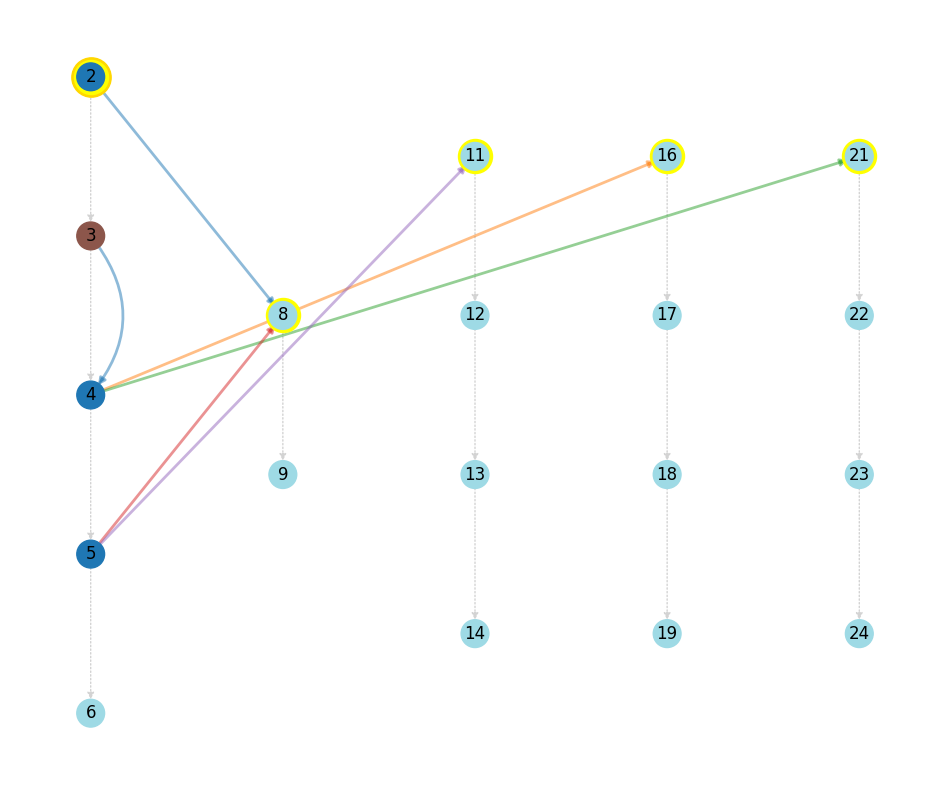

In [65]:
pop.individuals[0].as_lgp()